In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
%matplotlib inline

## Importing kaggle survey data

In [3]:
df = pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [4]:
new_df = df.drop(df.index[0])

In [5]:
new_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Number of rows is = ", new_df.shape[0], " \nNumber of columns is = " , new_df.shape[1]) 

Number of rows is =  25973  
Number of columns is =  369


## Distribution Based on Age Group

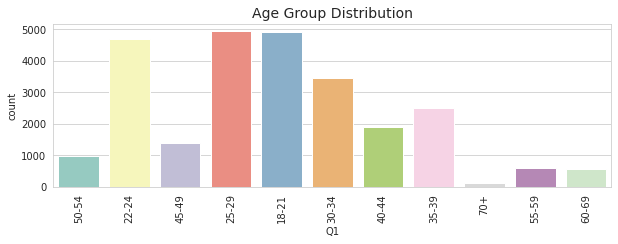

In [7]:
plt.figure(figsize=(10, 3))
plt.title('Age Group Distribution', fontsize=14)
sns.countplot(x = "Q1",data=new_df, palette="Set3")
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Maximum Survey Response of Kaggle 2021 is from people having age from 18 to 29  </p> </div>

## Country wise distribution

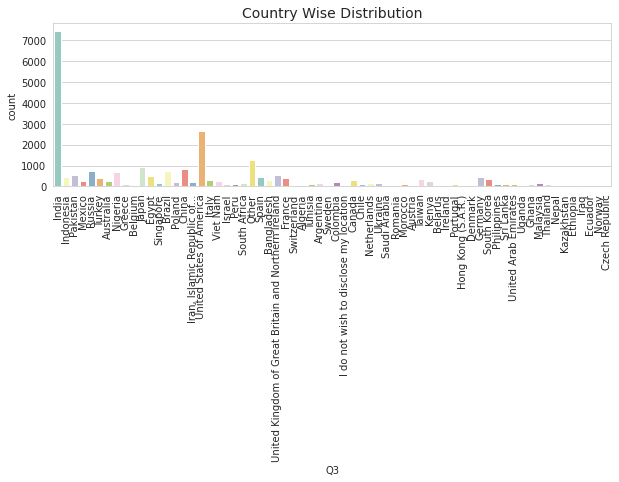

In [8]:
plt.figure(figsize=(10, 3))
plt.title('Country Wise Distribution', fontsize=14)
sns.countplot(x = "Q3",data=new_df, palette="Set3")
plt.xticks(rotation=90)
plt.show()

## Top 5 Countries 

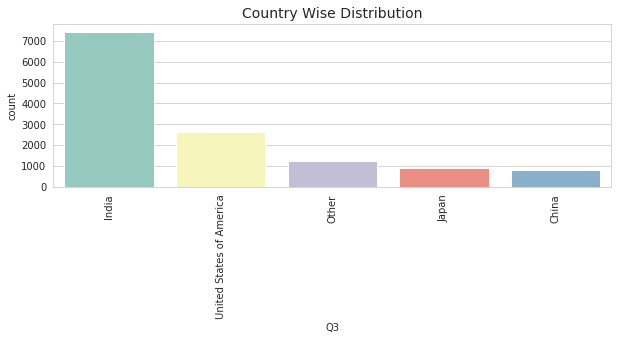

In [9]:
plt.figure(figsize=(10, 3))
plt.title('Country Wise Distribution', fontsize=14)
sns.countplot(x = "Q3",data=new_df, palette="Set3", order=new_df.Q3.value_counts().iloc[:5].index)
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Maximum Survey Response of Kaggle 2021 is from Country India.  </p> </div>

## Highest level of formal education distribution

In [10]:
new_df['Q4'].value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: Q4, dtype: int64

In [11]:
new_df.replace(["Master’s degree"], "Master's",inplace=True)
new_df.replace(["Bachelor’s degree"], "Bachelor",inplace=True)
new_df.replace(["Doctoral degree"], "PhD",inplace=True)
new_df.replace(["Professional doctorate"], "Prof PhD",inplace=True)
new_df.replace(["I prefer not to answer"], "Not Disclosed",inplace=True)
new_df.replace(["Some college/university study without earning a bachelor’s degree"], "No Bachelor Degree",inplace=True)

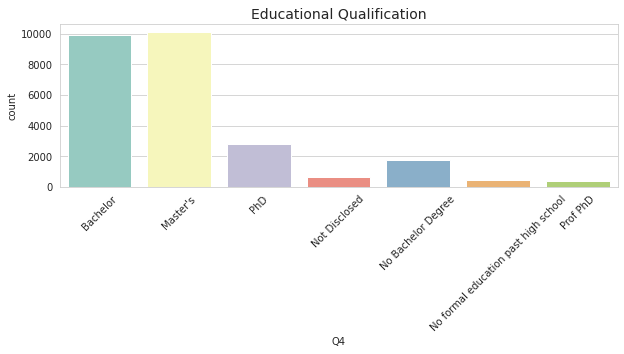

In [12]:
plt.figure(figsize=(10, 3))
plt.title('Educational Qualification', fontsize=14)
sns.countplot(x = "Q4",data=new_df, palette="Set3")
plt.xticks(rotation=45)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of people responding to Kaggle Survey have either Bachelor or Master Degree  </p> </div>

## Distribution Based on Gender

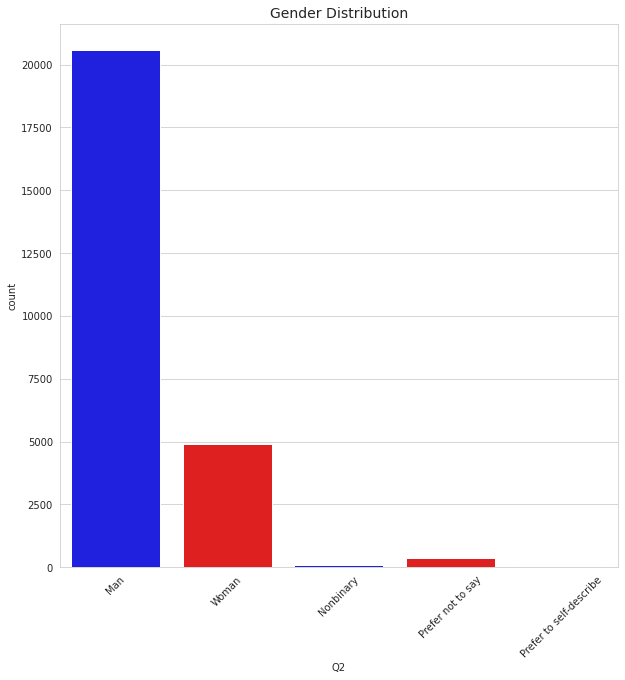

In [13]:
plt.figure(figsize=(10, 10))
colors = ["blue", "red"]
plt.title('Gender Distribution', fontsize=14)
sns.countplot(x = "Q2",data=new_df,  palette=colors)
plt.xticks(rotation=45)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of people responding to Kaggle Survey are Man</p> </div>

## Distribution Based on Profession

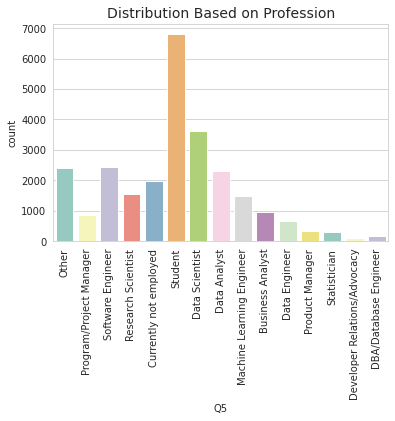

In [14]:
plt.title('Distribution Based on Profession', fontsize=14)
sns.countplot(x = "Q5",data=new_df,  palette="Set3")
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of people responding to Kaggle Survey are Students</p> </div>

## Distribution Based on Coding Experience

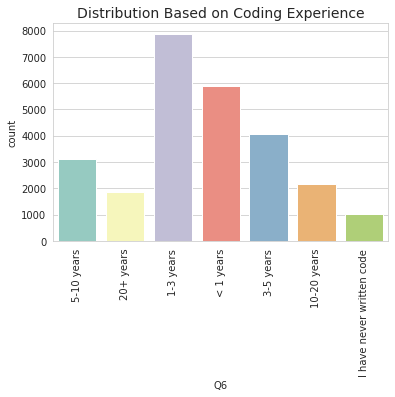

In [15]:
plt.title('Distribution Based on Coding Experience', fontsize=14)
sns.countplot(x = "Q6",data=new_df,  palette="Set3")
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of people responding to Kaggle Survey have coding experience 1-3</p> </div>

## 3D Plot of a Individual withrespect to Country, Profession, Gender and Education Qualification

In [16]:
plt.figure(figsize=(10, 3))
fig = px.scatter_3d(new_df, x='Q2', y='Q5', z='Q4', color='Q3')
fig.show()

<Figure size 720x216 with 0 Axes>

## Function Creation

In [17]:
def list_details(num, column_count):
    k = num
    i =1
    list_name = [new_df['Q'+str(k)+'_Part_'+str(i)].value_counts().index.tolist()[0]]
    i = i + 1
    while i <= column_count:
        list_name.append(new_df['Q'+str(k)+'_Part_'+str(i)].value_counts().index.tolist()[0])
        i = i + 1
 
    list_name.append(new_df['Q'+str(k)+'_OTHER'].value_counts().index.tolist()[0])
    return(list_name)

In [18]:
def list_count(num, column_count):
    k =num
    i =1
    list_count = [new_df['Q'+str(k)+'_Part_'+str(i)].value_counts()[0]]
    i = i + 1
    while i <= column_count:
        list_count.append(new_df['Q'+str(k)+'_Part_'+str(i)].value_counts()[0])
        i = i + 1
    
    list_count.append(new_df['Q'+str(k)+'_OTHER'].value_counts()[0])
    return(list_count)


In [19]:
def list_details_ch(num, extra_ch, column_count):
    k = num
    i =1
    list_name = [new_df['Q'+str(k)+'_'+extra_ch+'_Part_'+str(i)].value_counts().index.tolist()[0]]
    i = i + 1
    while i <= column_count:
        list_name.append(new_df['Q'+str(k)+'_'+extra_ch+'_Part_'+str(i)].value_counts().index.tolist()[0])
        i = i + 1
 
    list_name.append(new_df['Q'+str(k)+'_'+extra_ch+'_OTHER'].value_counts().index.tolist()[0])
    return(list_name)

In [20]:
def list_count_ch(num, extra_ch, column_count):
    k =num
    i =1
    list_count = [new_df['Q'+str(k)+'_'+extra_ch+'_Part_'+str(i)].value_counts()[0]]
    i = i + 1
    while i <= column_count:
        list_count.append(new_df['Q'+str(k)+'_'+extra_ch+'_Part_'+str(i)].value_counts()[0])
        i = i + 1
    
    list_count.append(new_df['Q'+str(k)+'_'+extra_ch+'_OTHER'].value_counts()[0])
    return(list_count)


In [21]:
def plotlistcount(list_name,list_count):
    
    Skills =list_name
    Count = list_count
    
    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plt.bar(Skills, Count, color=['purple', 'red', 'green', 'blue', 'cyan'])
    plt.xticks(rotation=90)
    plt.subplot(132)
    plt.scatter(Skills, Count)
    plt.xticks(rotation=90)
    plt.subplot(133)
    plt.plot(Skills, Count)
    plt.xticks(rotation=90)
    plt.show()


## Distribution with respect to Skill Set

In [22]:
Q7_col = len([col for col in new_df if col.startswith('Q7')])
Q7_col = Q7_col-1

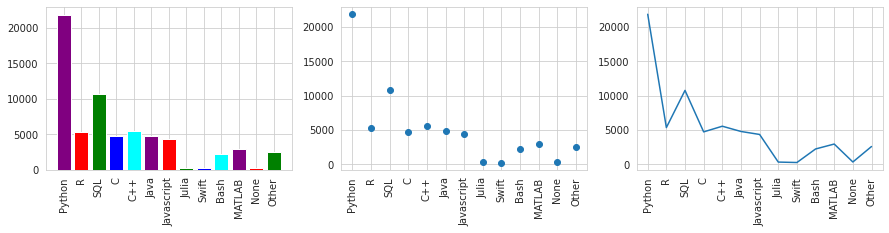

In [23]:
skill_list1 =list_details(7,Q7_col)
skill_list1_count = list_count(7,Q7_col)
plotlistcount(skill_list1,skill_list1_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Major Skill Individual possess is Python. </p> </div>

##  Visualization Based on Integrated Development Used

In [24]:
Q9_col = len([col for col in new_df if col.startswith('Q9')])
Q9_col = Q9_col-1

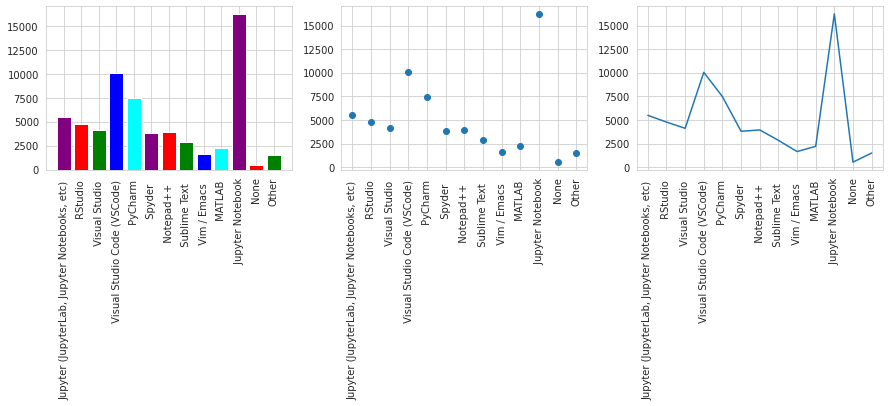

In [25]:
dev_list =list_details(9,Q9_col)
dev_list_count = list_count(9,Q9_col)
plotlistcount(dev_list,dev_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of the user are using Jupyter Notebook, however a very few users have clubbed Jupyter notebook along with Jupyter Lab </p> </div>

## Visualization Based on Hosted NoteBook Product

In [26]:
Q10_col = len([col for col in new_df if col.startswith('Q10')])
Q10_col = Q10_col-1

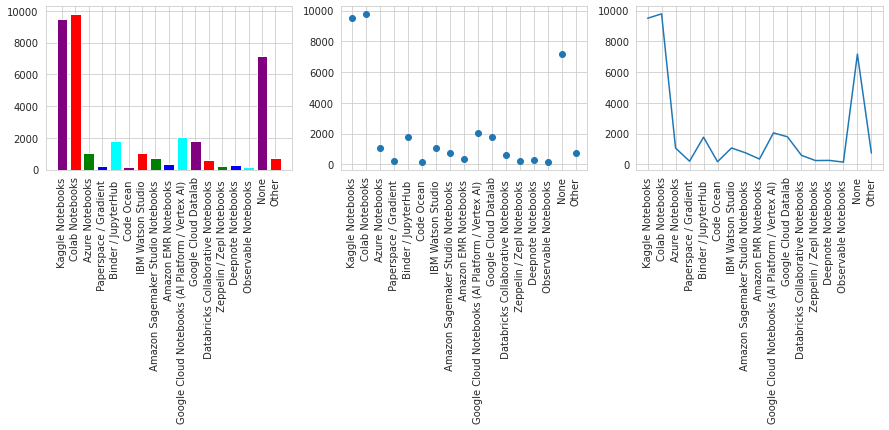

In [27]:
Note_list =list_details(10,Q10_col)
Note_list_count = list_count(10,Q10_col)
plotlistcount(Note_list,Note_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of the user are using google colab notebook, closely followed by kaggle notebook.</p> </div>

## Visualization Based on Computational Platform

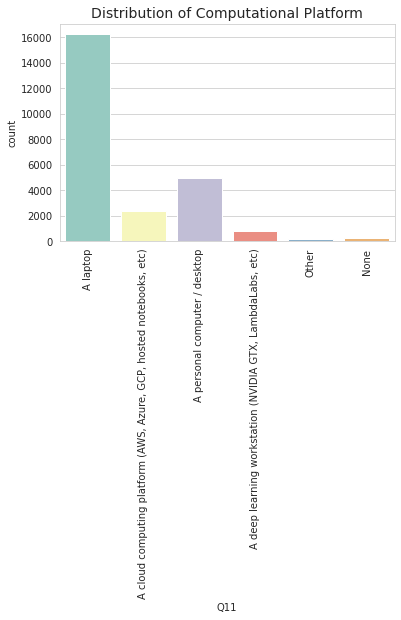

In [28]:
plt.title('Distribution of Computational Platform', fontsize=14)
sns.countplot(x = "Q11",data=new_df,  palette="Set3")
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of the user are using Laptop </p> </div>

## Visualization Based on Hardware Used

In [29]:
Q12_col = len([col for col in new_df if col.startswith('Q12')])
Q12_col= Q12_col-1

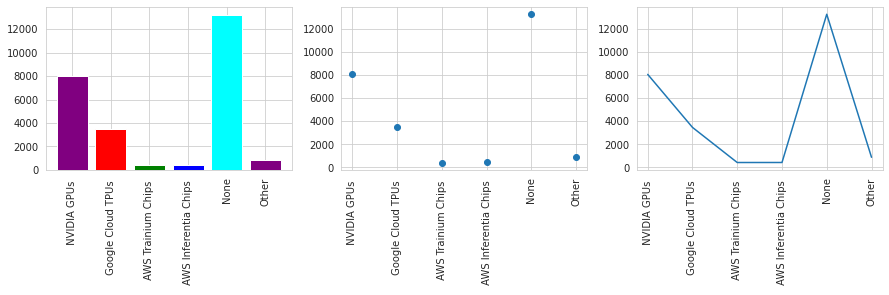

In [30]:
hardware_list =list_details(12,Q12_col)
hardware_list_count = list_count(12,Q12_col)
plotlistcount(hardware_list,hardware_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Based on data available majority of users does not use any harware. From the users using hardware, majority are using NVIDIA GPUs. </p> </div>

## Visualization Based on Visualization Libraries or Tools Used

In [31]:
Q14_col = len([col for col in new_df if col.startswith('Q14')])
Q14_col = Q14_col -1

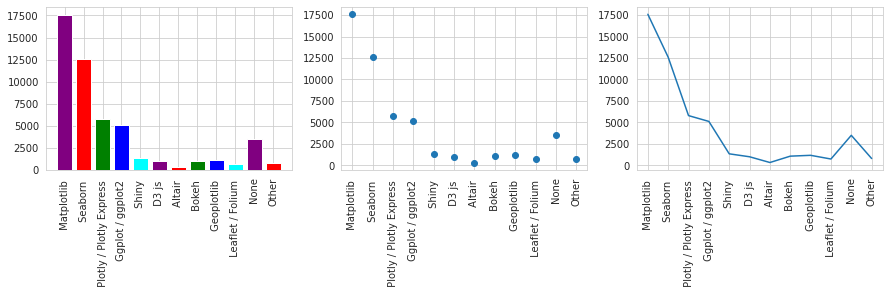

In [32]:
Visual_Lib_list =list_details(14,Q14_col)
Visual_Lib_list_count = list_count(14,Q14_col)
plotlistcount(Visual_Lib_list,Visual_Lib_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Matplotlib is the widely used library for visualisation and then seaborn. </p> </div>

## Visualization Based on Machine Learning Experience.

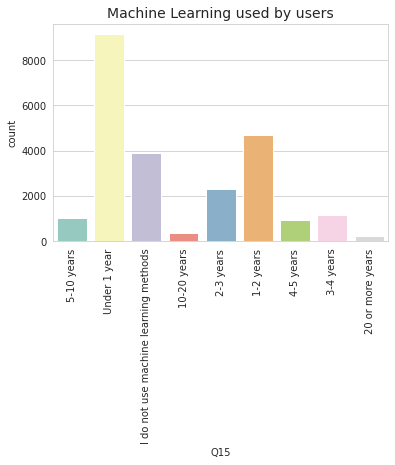

In [33]:
plt.title('Machine Learning used by users', fontsize=14)
sns.countplot(x = "Q15",data=new_df,  palette="Set3")
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of the user filled survey are new to Machine Learning and are having experience under 1 year. </p> </div>

## Visualization Based on Machine Learning Framework

In [34]:
Q16_col = len([col for col in new_df if col.startswith('Q16')])
Q16_col  = Q16_col -1

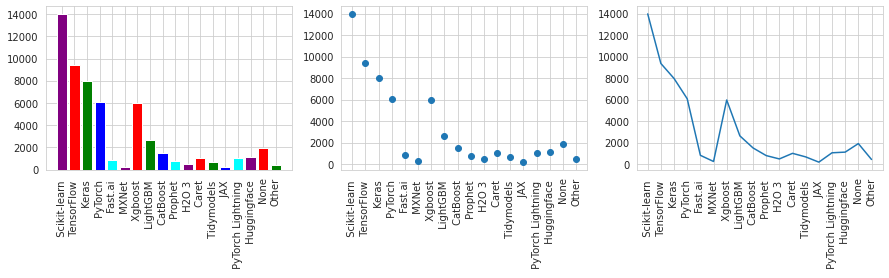

In [35]:
framework_list =list_details(16,Q16_col)
framework_list_count = list_count(16,Q16_col)
plotlistcount(framework_list,framework_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of the user are using scikit-learn framework. Then users are preferring Tensorflow and keras </p> </div>

## Visualization Based on Machine Learning Algorithm Used

In [36]:
Q17_col = len([col for col in new_df if col.startswith('Q17')])
Q17_col  = Q17_col -1

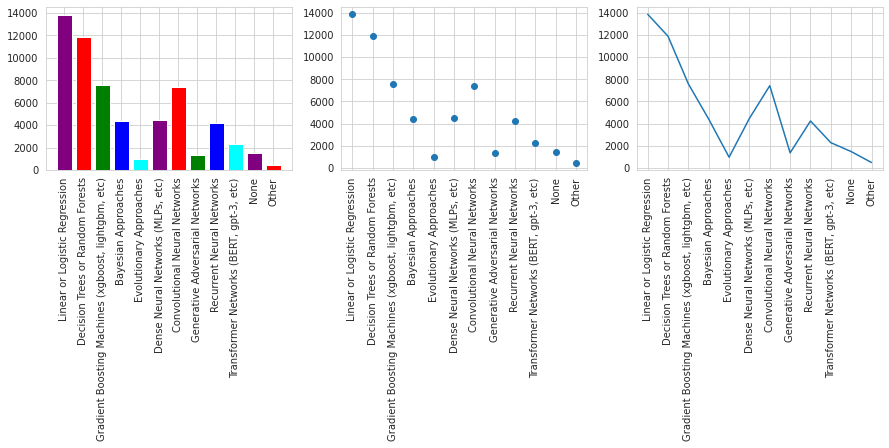

In [37]:
ml_list =list_details(17,Q17_col)
ml_list_count = list_count(17,Q17_col)
plotlistcount(ml_list,ml_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of the user are using logistic or linear regression then followed by Decision Tree or Random Forest.  </p> </div>

## Visualization Based on Categories of Computer Vision Method Used

In [38]:
Q18_col = len([col for col in new_df if col.startswith('Q18')])
Q18_col  = Q18_col -1

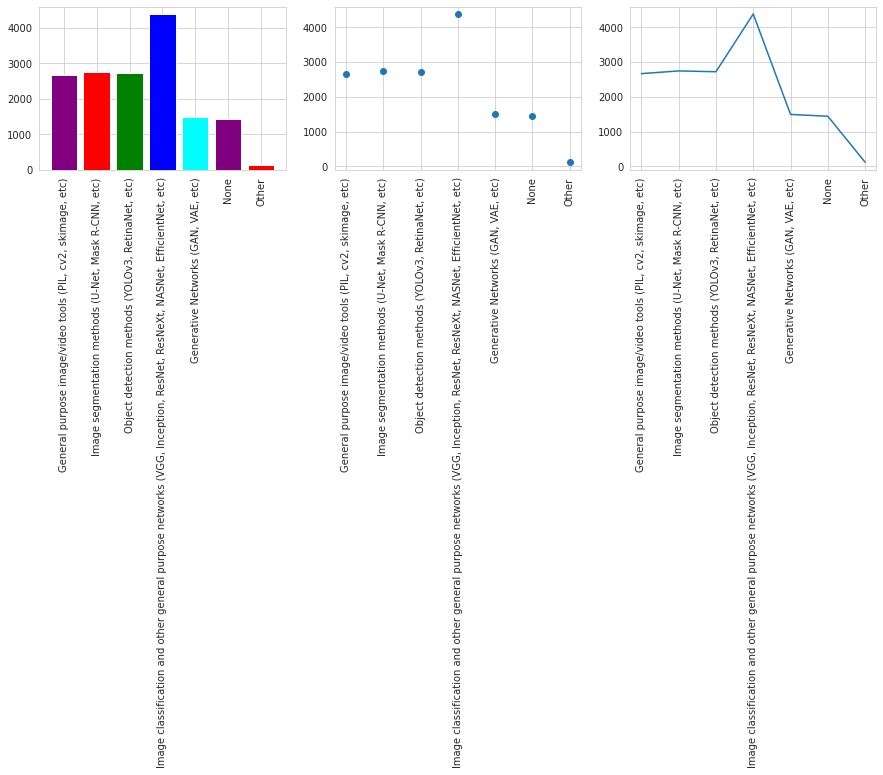

In [39]:
cmptr_vision_list =list_details(18,Q18_col)
cmptr_vision_list_count = list_count(18,Q18_col)
plotlistcount(cmptr_vision_list,cmptr_vision_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Computer Vision Method is mostly used for Image Classification and for Object detection, Image Segmentation computer vision are used almost same.  </p> </div>

## Visualization Based on NLP

In [40]:
Q19_col = len([col for col in new_df if col.startswith('Q19')])
Q19_col  = Q19_col -1

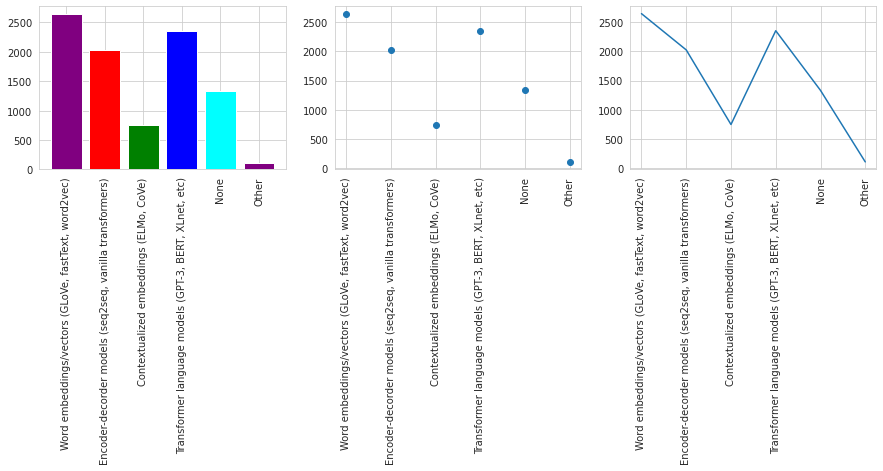

In [41]:
nlp_list =list_details(19,Q19_col)
nlp_list_count = list_count(19,Q19_col)
plotlistcount(nlp_list,nlp_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Word embeddings/vectors (GLoVe, fastText, word2vec) are mostly used for NLP </p> </div>

## Visualization Based on current Employement of User.

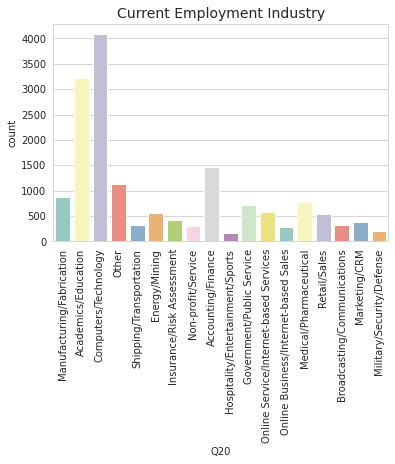

In [42]:
plt.title('Current Employment Industry', fontsize=14)
sns.countplot(x = "Q20",data=new_df,  palette="Set3")
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of the user beling to computer or technology industry and then followed by educational industry.</p> </div>

## Visualization Based status of ML used by users Employer

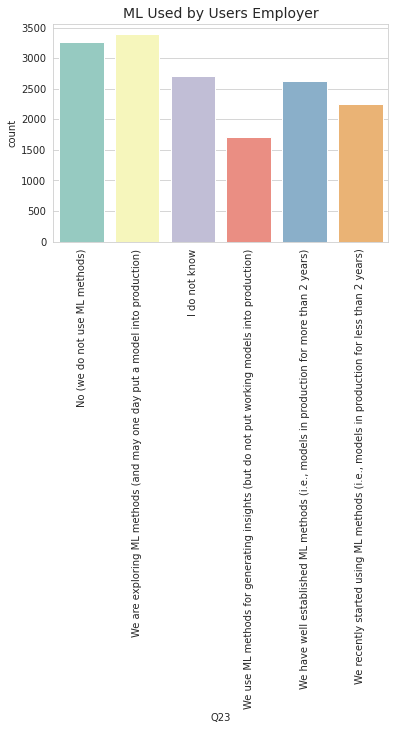

In [43]:
plt.title('ML Used by Users Employer', fontsize=14)
sns.countplot(x = "Q23",data=new_df,  palette="Set3")
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
From the current it is seen that usage of ML is at starting phase, few are using in production less than 2 years. Other than these, those who are using are for generating insights but working model are still not in production.</p> </div>

## Visualization Based on Important Operation Activities

In [44]:
Q24_col = len([col for col in new_df if col.startswith('Q24')])
Q24_col  = Q24_col -1

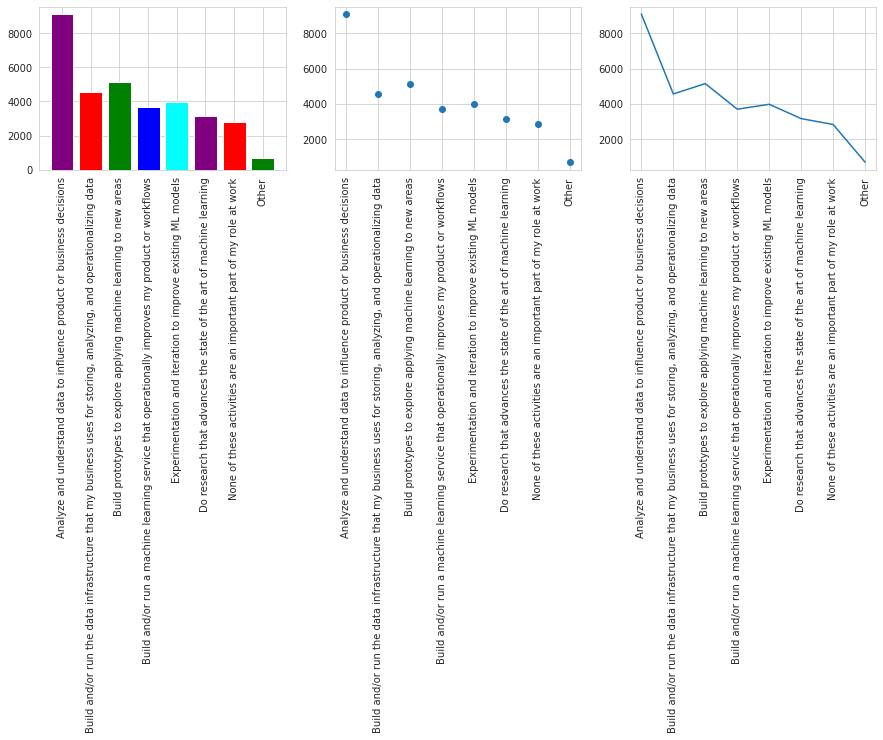

In [45]:
imp_list =list_details(24,Q24_col)
imp_list_count = list_count(24,Q24_col)
plotlistcount(imp_list,imp_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most users are using data for Analyze and understand it to check if it influences product or business decisions</p> </div>

## Visualization Based on Compensation of Users

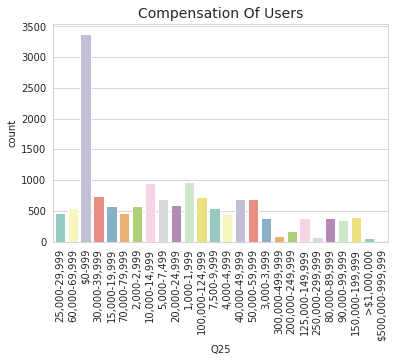

In [46]:
plt.title('Compensation Of Users', fontsize=14)
sns.countplot(x = "Q25",data=new_df,  palette="Set3")
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
In starting of EDA we have seen most of the users who have given survey are students, so as per current visualisation also it is clear than most users belong to lowest slab.</p> </div>

## Visualization Based on Cloud Computing Platform

In [47]:
Q27_col = len([col for col in new_df if col.startswith('Q27_A')])
Q27_col  = Q27_col -1

In [48]:
extra_Char = 'A'

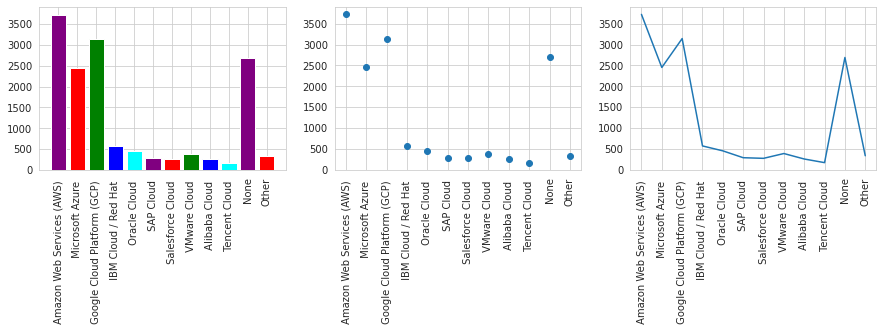

In [49]:
cloud_list =list_details_ch(27, extra_Char,Q27_col)
cloud_list_count = list_count_ch(27, extra_Char,Q27_col)
plotlistcount(cloud_list,cloud_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
AWS is mostly preferred cloud computing platform.</p> </div>

## Visualization of Cloud Computing Platform Which Users aware of.

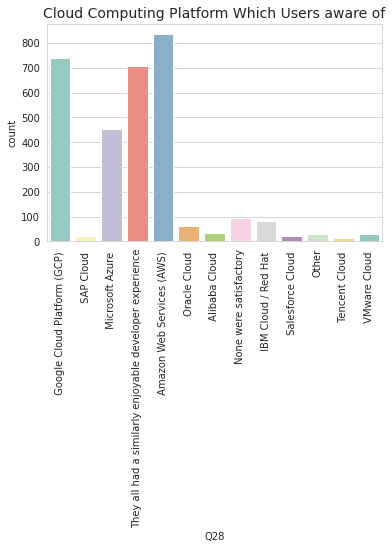

In [50]:
plt.title('Cloud Computing Platform Which Users aware of', fontsize=14)
sns.countplot(x = "Q28",data=new_df,  palette="Set3")
plt.xticks(rotation=90)
plt.show()

## Visualization based on User's Future Improvement

In [51]:
Q29_B_col = len([col for col in new_df if col.startswith('Q29_B')])
Q29_B_col  = Q29_B_col -1
Q31_B_col = len([col for col in new_df if col.startswith('Q31_B')])
Q31_B_col  = Q31_B_col -1
Q38_B_col = len([col for col in new_df if col.startswith('Q38_B')])
Q38_B_col  = Q38_B_col -1

In [52]:
extra_Cha = 'B'

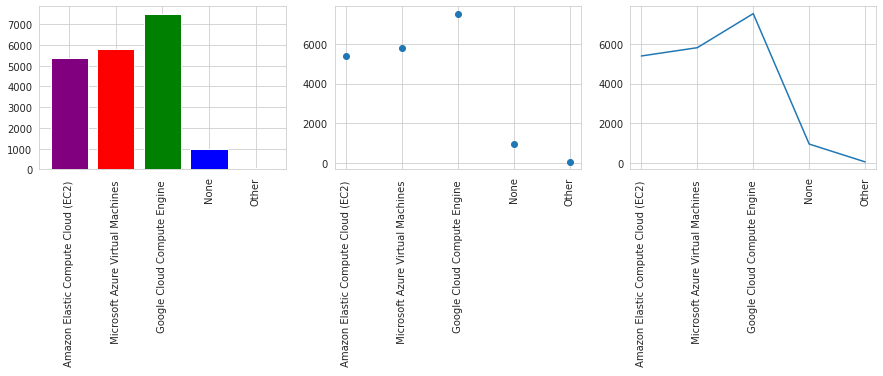

In [53]:
ist =list_details_ch(29, extra_Cha,Q29_B_col)
ist_count = list_count_ch(29, extra_Cha,Q29_B_col)
plotlistcount(ist,ist_count)

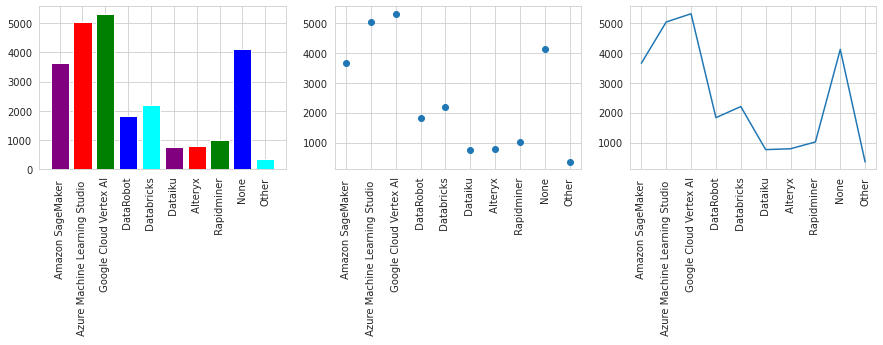

In [54]:
ist1 =list_details_ch(31, extra_Cha,Q31_B_col)
ist_count1 = list_count_ch(31, extra_Cha,Q31_B_col)
plotlistcount(ist1,ist_count1)

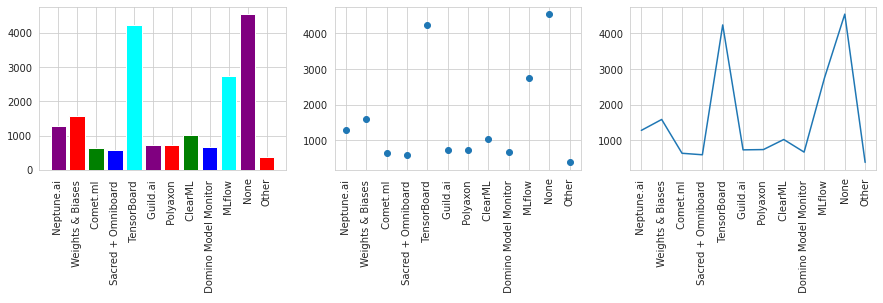

In [55]:
ist2 =list_details_ch(38, extra_Cha,Q38_B_col)
ist_count2 = list_count_ch(38, extra_Cha,Q38_B_col)
plotlistcount(ist2,ist_count2)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of the user like to improve skills in Amazon Elastic Compute Cloud, Google Cloud Vertex AI and TensorBoard.</p> </div>

## Visualization Based on Data Storage 

In [56]:
Q30_col = len([col for col in new_df if col.startswith('Q30_A')])
Q30_col  = Q30_col -1

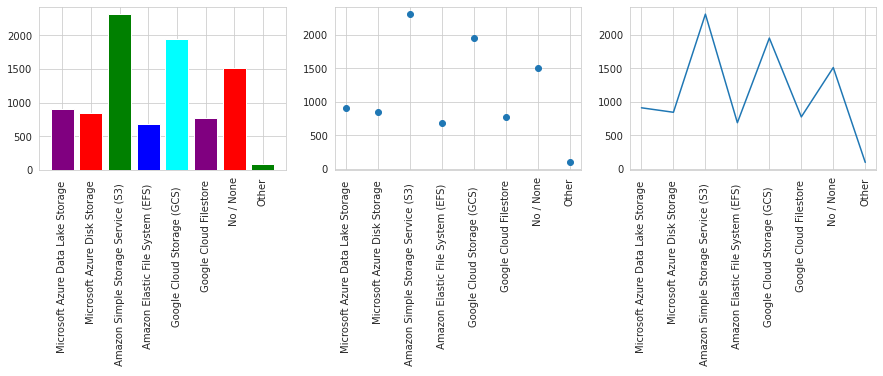

In [57]:
dataStorage_list =list_details_ch(30, extra_Char,Q30_col)
dataStorage_list_count = list_count_ch(30, extra_Char,Q30_col)
plotlistcount(dataStorage_list,dataStorage_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Amazon Simple Storage is mostly preferred source of data storage.</p> </div>

## Visualization Based on Managed Machine Learning Platforms

In [58]:
Q31_col = len([col for col in new_df if col.startswith('Q31_A')])
Q31_col  = Q31_col -1

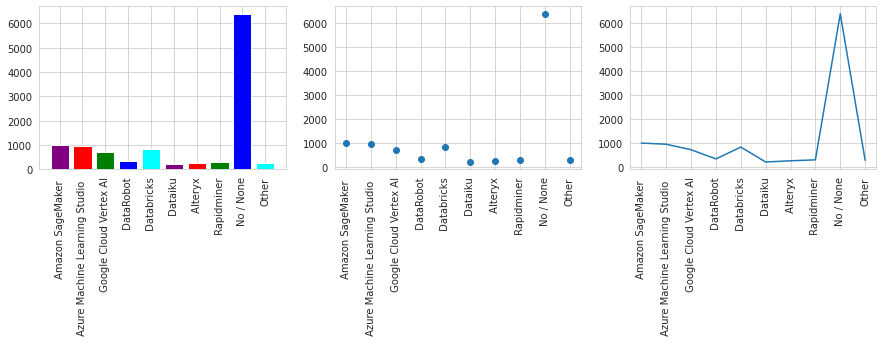

In [59]:
mang_ml_list =list_details_ch(31, extra_Char,Q31_col)
mang_ml_list_count = list_count_ch(31, extra_Char,Q31_col)
plotlistcount(mang_ml_list,mang_ml_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Almost all users are not using managed machine learning platform. Out of the few those who are using Amazon sagamaker, Azuze ML studio and Databricks are leading</p> </div>

## Visualization Based on Big Data Products

In [60]:
Q32_col = len([col for col in new_df if col.startswith('Q32_A')])
Q32_col  = Q32_col -1

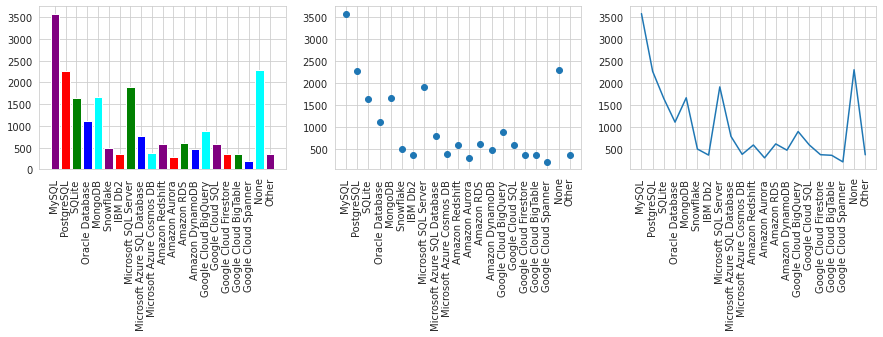

In [61]:
bigData_list =list_details_ch(32, extra_Char,Q32_col)
bigData_list_count = list_count_ch(32, extra_Char,Q32_col)
plotlistcount(bigData_list,bigData_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most Preferred one is MySQL</p> </div>

## Visualization Based on Business Intelligence Tool

In [62]:
Q34_col = len([col for col in new_df if col.startswith('Q34_A')])
Q34_col  = Q34_col -1

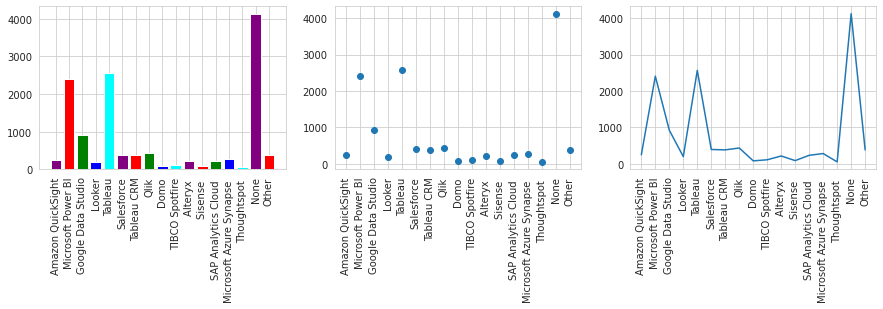

In [63]:
biTool_list =list_details_ch(34, extra_Char,Q34_col)
biTool_list_count = list_count_ch(34, extra_Char,Q34_col)
plotlistcount(biTool_list,biTool_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most of the users are not using any Business Intelligence Tool. Users those who are using are preferring Tableau and then Microsoft Power BI.</p> </div>

## Visualization Based on Automated Machine Learning Tool

In [64]:
Q36_col = len([col for col in new_df if col.startswith('Q36_A')])
Q36_col  = Q36_col -1

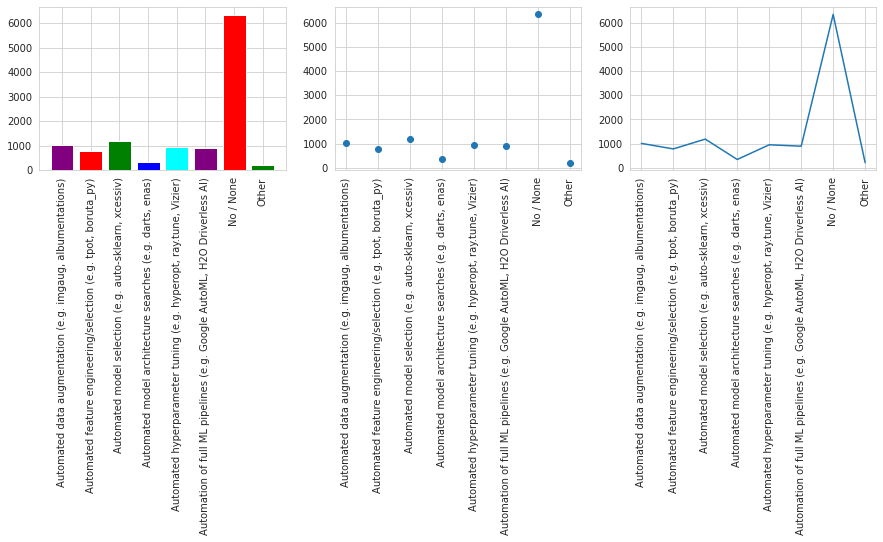

In [65]:
aML_list =list_details_ch(36, extra_Char,Q36_col)
aML_list_count = list_count_ch(36, extra_Char,Q36_col)
plotlistcount(aML_list,aML_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Majority of the users are not using any automated ML Tool</p> </div>

## Visualization Based on Machine Learning WorkFlow

In [66]:
Q38_col = len([col for col in new_df if col.startswith('Q38_A')])
Q38_col  = Q38_col -1

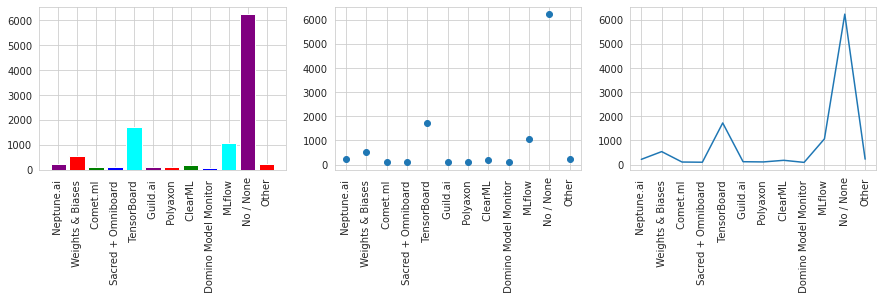

In [67]:
wML_list =list_details_ch(38, extra_Char,Q38_col)
wML_list_count = list_count_ch(38, extra_Char,Q38_col)
plotlistcount(wML_list,wML_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Majority of the users are not using any ML workflow</p> </div>

## Visualization Based Preferred Data Analysis Platform 

In [68]:
Q39_col = len([col for col in new_df if col.startswith('Q39')])
Q39_col  = Q39_col -1

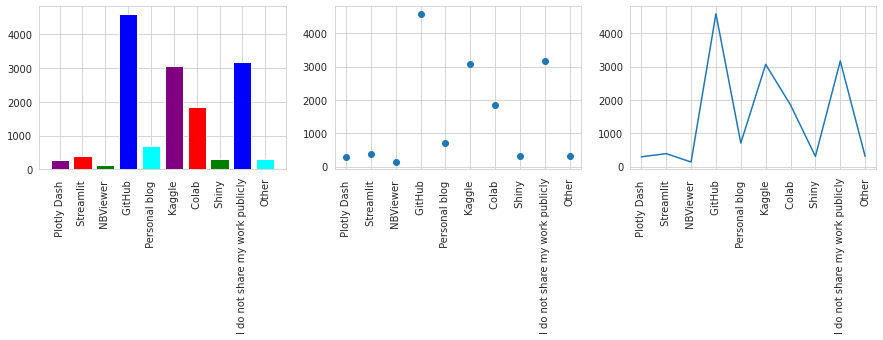

In [69]:
dataPlt_list =list_details(39,Q39_col)
dataPlt_list_count = list_count(39 ,Q39_col)
plotlistcount(dataPlt_list,dataPlt_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Majority of the user share their analyzed data in GitHub</p> </div>

## Visualization Based Learning Platform

In [70]:
Q40_col = len([col for col in new_df if col.startswith('Q40')])
Q40_col  = Q40_col -1

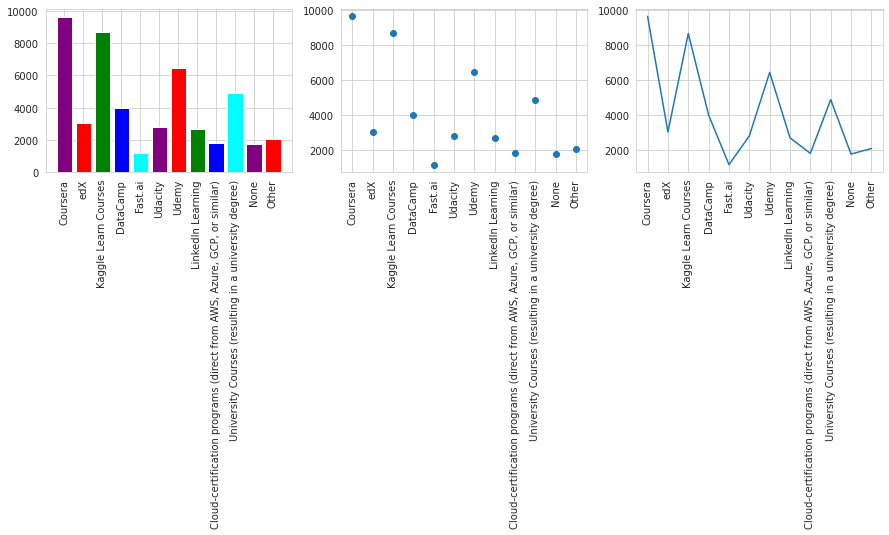

In [71]:
ePlt_list =list_details(40,Q40_col)
ePlt_list_count = list_count(40,Q40_col)
plotlistcount(ePlt_list,ePlt_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most preferred platform is Coursera followed by Kaggle Learn Courses</p> </div>

## Visualization Based on Tool Used at Work

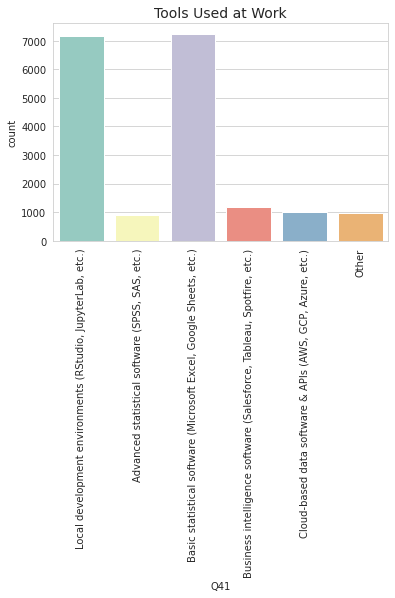

In [72]:
plt.title('Tools Used at Work', fontsize=14)
sns.countplot(x = "Q41",data=new_df,  palette="Set3")
plt.xticks(rotation=90)
plt.show()

## Visualization Based on Media Source

In [73]:
Q42_col = len([col for col in new_df if col.startswith('Q42')])
Q42_col  = Q42_col -1

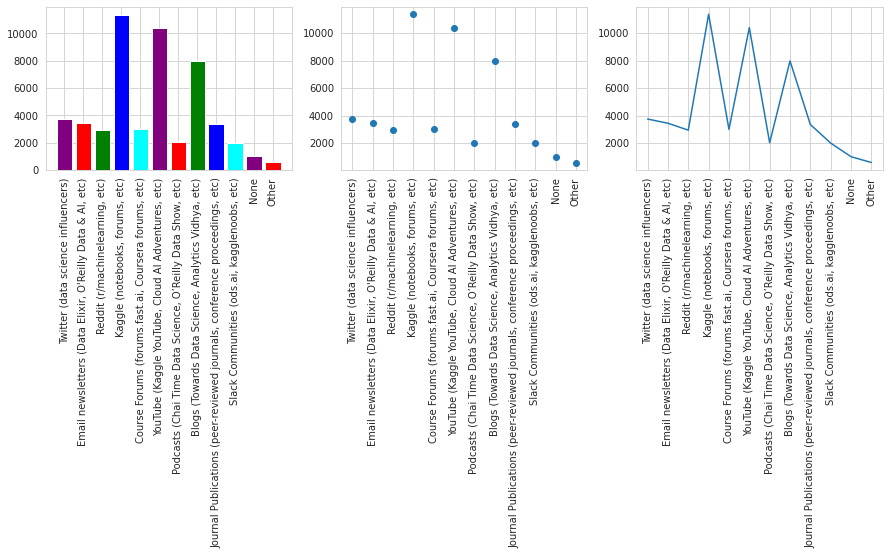

In [74]:
mSource_list =list_details(42,Q40_col)
mSource_list_count = list_count(42,Q40_col)
plotlistcount(mSource_list,mSource_list_count)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Most preferred media source is Kaggle notebook. </p> </div>